In [ ]:
#downloading dataset and importing libraries
import os
os.environ["KAGGLE_USERNAME"]="riddhikariddhika"
os.environ["KAGGLE_KEY"] = "d3a37094635008125f798e2a88ca6e8e"
!kaggle datasets download riddhikariddhika/lung-cancer-prediction

  0% 0.00/196 [00:00<?, ?B/s]
100% 196/196 [00:00<00:00, 307kB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense


In [ ]:
from IPython.display import clear_output

!unzip cancer-prediction.zip

clear_output()
%load_ext tensorboard


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data processing and augmentation
df=pd.read_csv('/content/drive/MyDrive/cancer prediction/cancer patient data sets.csv')

df.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.shape

(1000, 26)

In [ ]:
df = df.drop(['index', 'Patient Id'], axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
x=df.drop(['Level'], axis=1)

y=df.drop(['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Frequent Cold','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Dry Cough','Snoring'],axis=1)
y.head()

,Level
0,Low
1,Medium
2,High
3,High
4,High


In [ ]:
x.head()


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:

x #features

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
y #target

,Level
0,Low
1,Medium
2,High
3,High
4,High
...,...
995,High
996,High
997,High
998,High


In [ ]:

x.shape

(1000, 23)

In [ ]:
y.shape

(1000, 1)

In [ ]:
#encoding
categorical_columns=['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood','Frequent Cold','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Dry Cough','Snoring']
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    x[column] = label_encoders[column].fit_transform(x[column])
target=['Level']
label_encoders = {}
for column in target:
    label_encoders[column] = LabelEncoder()
    y[column] = label_encoders[column].fit_transform(y[column])

In [ ]:
#model structure
model = Sequential([
    Input(shape=[23]),
    Dense(15, activation="relu"),
    Dense(10, activation="relu"),
    Dense(3, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.25)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))



Epoch 1/25
24/24 [==============================] - 2s 19ms/step - loss: 1.2192 - accuracy: 0.3960 - val_loss: 1.0736 - val_accuracy: 0.4080
Epoch 2/25
24/24 [==============================] - 0s 7ms/step - loss: 1.0079 - accuracy: 0.4600 - val_loss: 0.9351 - val_accuracy: 0.4800
Epoch 3/25
24/24 [==============================] - 0s 5ms/step - loss: 0.8975 - accuracy: 0.5453 - val_loss: 0.8422 - val_accuracy: 0.5480
Epoch 4/25
24/24 [==============================] - 0s 6ms/step - loss: 0.7935 - accuracy: 0.5787 - val_loss: 0.7279 - val_accuracy: 0.6320
Epoch 5/25
24/24 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6813 - val_loss: 0.6354 - val_accuracy: 0.7480
Epoch 6/25
24/24 [==============================] - 0s 6ms/step - loss: 0.6006 - accuracy: 0.7573 - val_loss: 0.5755 - val_accuracy: 0.7880
Epoch 7/25
24/24 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.8240 - val_loss: 0.5246 - val_accuracy: 0.8360
Epoch 8/25
24/24 [=

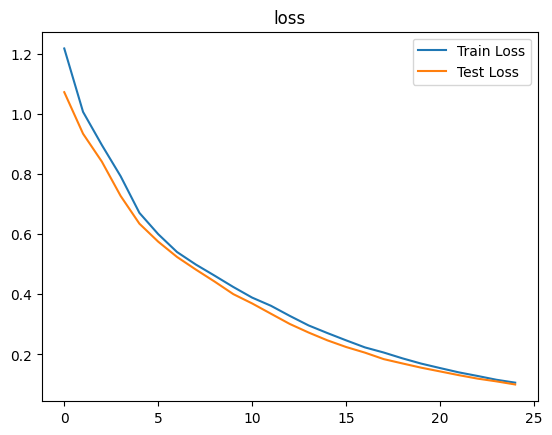

In [ ]:
#plotting graph for loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.legend()
plt.title("loss")
plt.show()


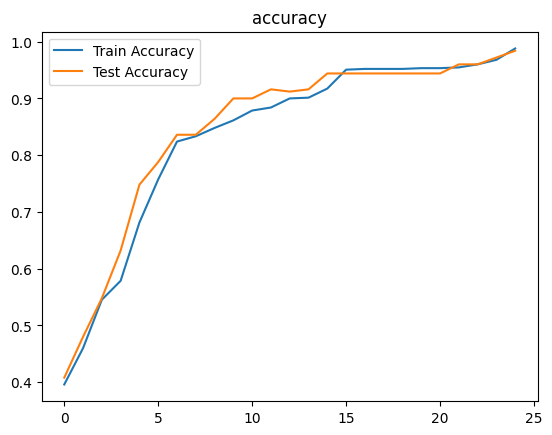

In [ ]:
#plotting graph for accuracy
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.title("accuracy")
plt.show()

In [ ]:
#preditions
x_pred = model.predict(x_test)
x_pred = np.round(y_pred)
print(x_pred)

8/8 [==============================] - 0s 3ms/step
[1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 

In [ ]:
y_pred=y_pred.flatten()
y_pred = y_pred.astype(int)
#decoding
inverse_label_encoders = {}
for column in target:
    inverse_label_encoders[column] = label_encoders[column].inverse_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred)

[1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 

In [ ]:
print(x_test)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
665    2       1              5            7             6   
666   26       0              5            4             5   
375   27       0              3            1             2   
722   30       0              2            1             0   
804    3       0              2            1             3   
..   ...     ...            ...          ...           ...   
599    4       1              1            0             2   
559   18       0              6            6             6   
763   10       0              5            6             6   
148   10       0              5            6             7   
766   20       1              5            7             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
665                     6             6                     5              6   
666                     4             4                     3              5   
375            

In [ ]:

x_test=np.arange(0,len(x_test),1)
type(x_test)

numpy.ndarray

In [ ]:
#evaluation of model
accuracy = model.evaluate(x_test, y_test)[1]


8/8 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9840


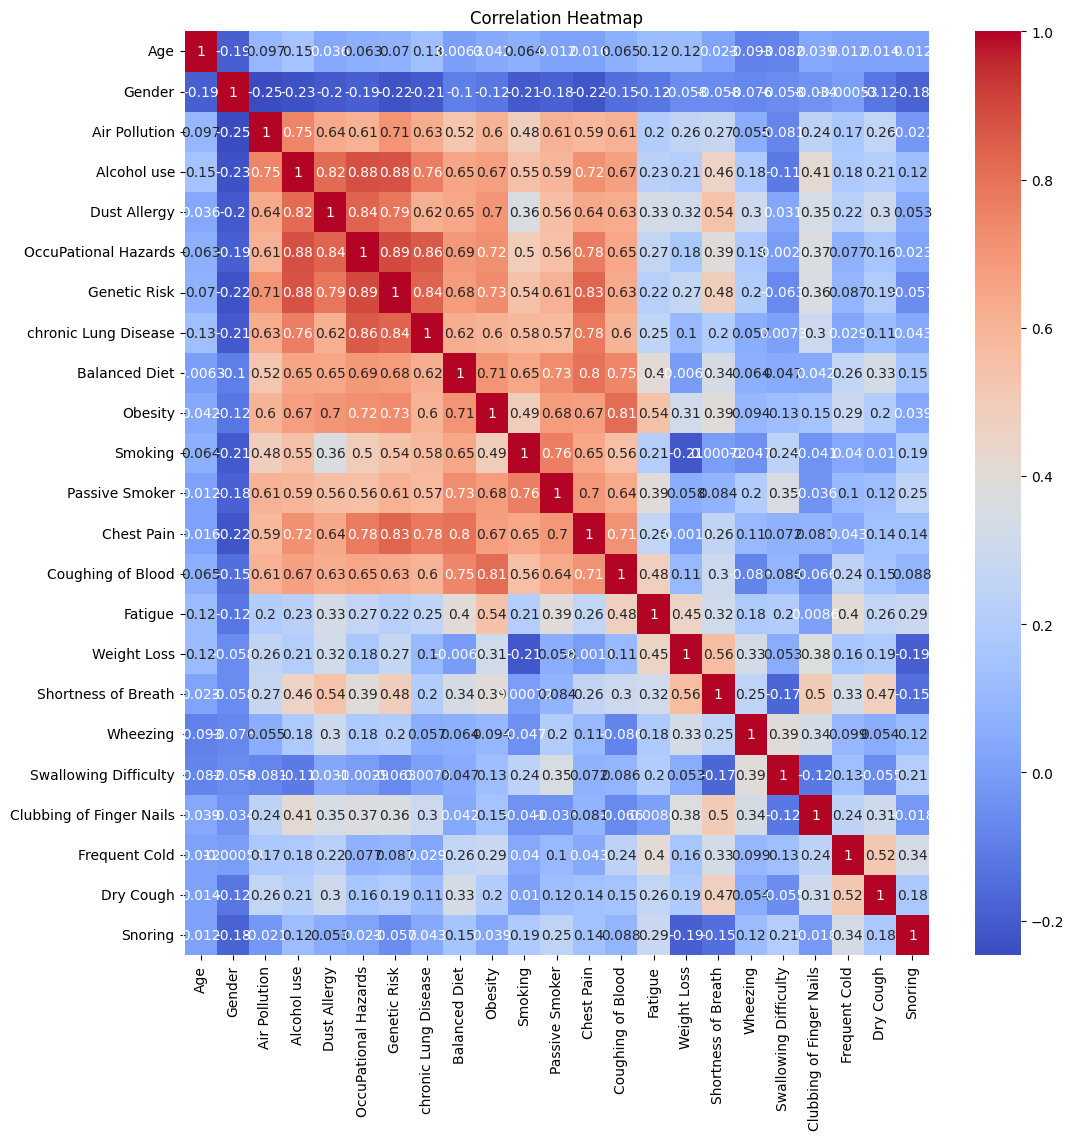

In [ ]:
#plotting correlation heatmap
import seaborn as sns
correlation_matrix=x.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

y_test=y_test.T
#len(y_test)
x_test.shape

(250,)

In [ ]:
y_test.shape

(1, 250)

In [ ]:
y_pred.shape

(750,)

In [ ]:
print(y_test)

     Level
665      0
666      0
375      1
722      1
804      2
..     ...
599      1
559      0
763      0
148      1
766      0

[250 rows x 1 columns]
